In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('winequality-red.csv')
df.shape

(1599, 12)

In [56]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [57]:
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


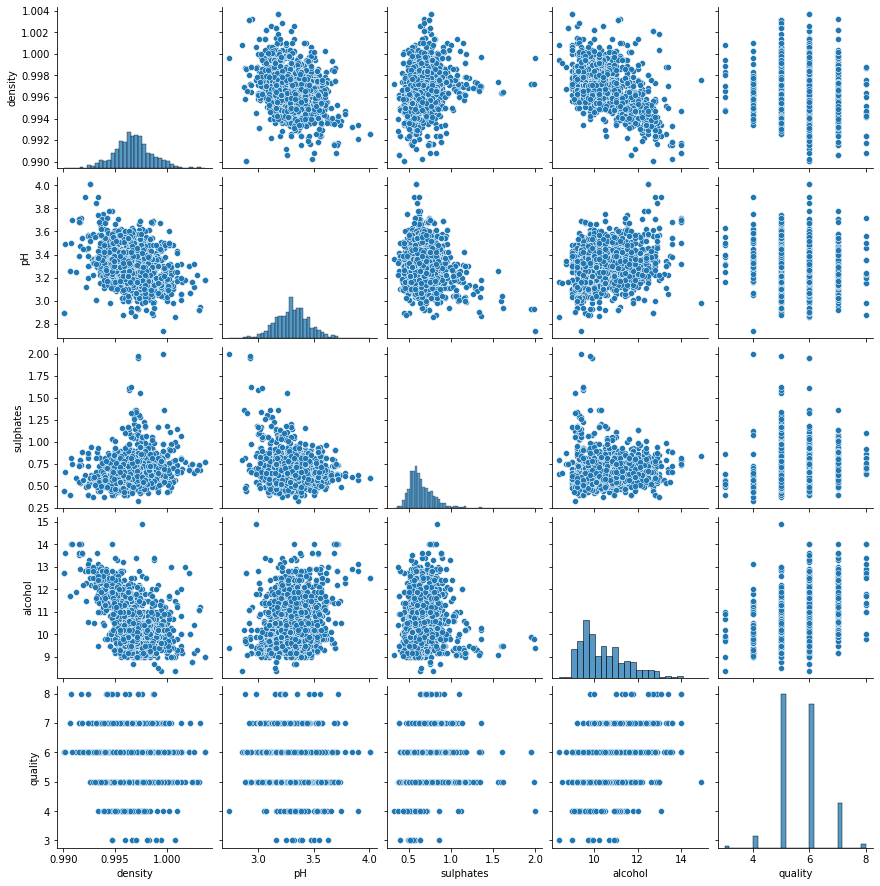

In [58]:
sns.pairplot(df.iloc[:,7:12])

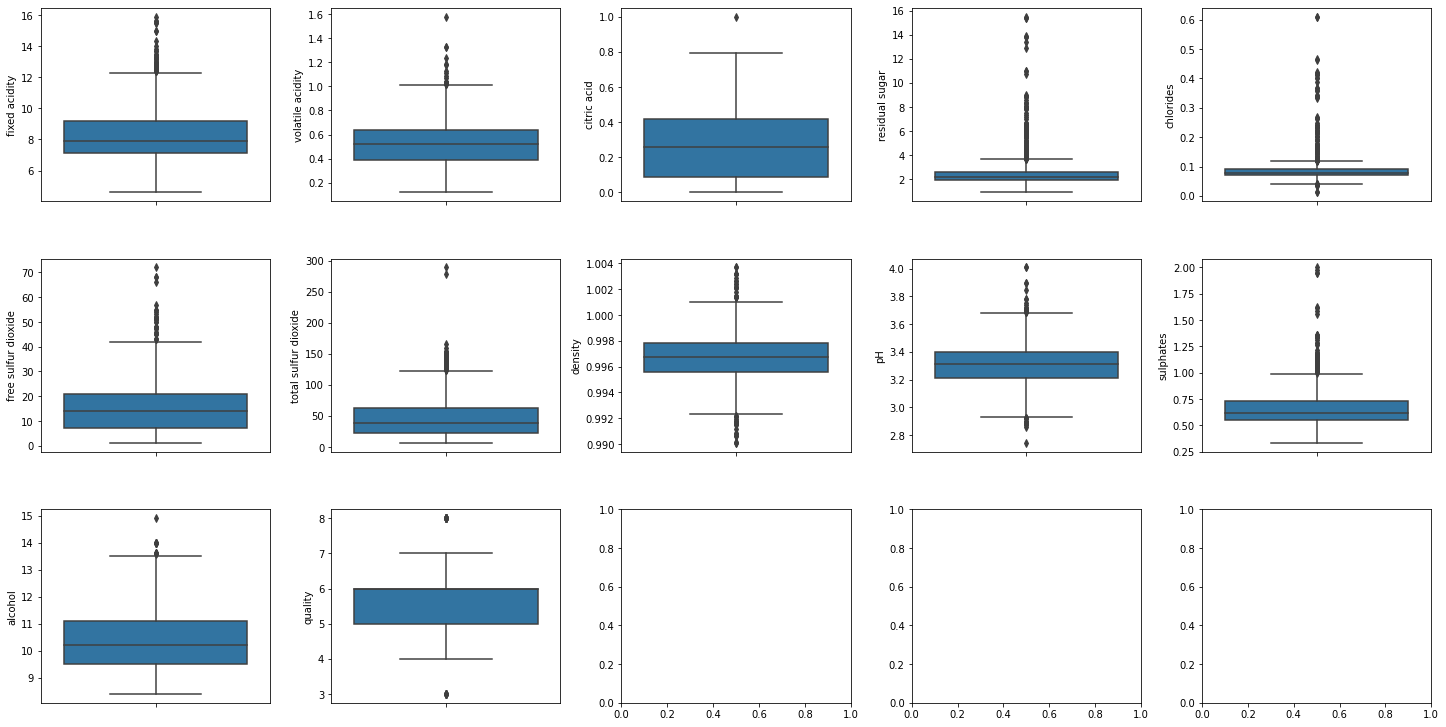

In [59]:
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [60]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)]

In [61]:
df['tasty'] = [0 if x < 6 else 1 for x in df['quality']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
df = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol','tasty','quality']]

In [63]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [64]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0)

In [65]:
from sklearn.preprocessing import MinMaxScaler
prp = MinMaxScaler()
X_train = prp.fit_transform(X_train)
X_test = prp.transform(X_test)

In [66]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [67]:
y_pred= reg.predict(X_test)
y_pred.shape

(291,)

In [68]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7627130620591404

In [69]:
X2 = df.iloc[:,:-1].values
y2=df.iloc[:,-1].values

In [70]:
from sklearn.model_selection import train_test_split
X2_train , X2_test ,y2_train , y2_test = train_test_split(X2,y2,test_size = 0.2 , random_state = 0)

In [71]:
from sklearn.preprocessing import StandardScaler
prp = StandardScaler()
X2_train = prp.fit_transform(X2_train)
X2_test = prp.transform(X2_test)

In [72]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [73]:
y2_pred = reg.predict(X2_test)

In [74]:
from sklearn.metrics import r2_score
r2_score(y2_test, y2_pred)

0.3475175324675326